# MODEL PROJECT 

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [5]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description of Broydens method 

Boyden’s method is a numerical algorithm used for solving systems of nonlinear equations. It is an iterative method that finds the roots of a set of n nonlinear equations in n variables, where n can be any positive integer. 

It uses the secant method, which uses a finite difference approximation to estimate the Jacobian matrix. Here it uses the current approximation of the Jacobian matrix and the changes in the values of the variables, to compute a new estimate of the Jacobian matrix at the next iteration.

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in power
  return (ktilde_t**(-alpha)*(delta + g*n + g + n)/s_H)**((phi - 1)**(-1.0))


Text(0, 0.5, 'Accumulative disposable income')

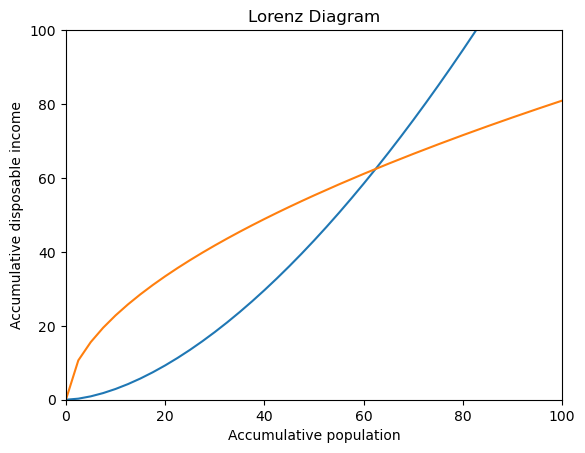

In [3]:
# 1. First we define our symbols:
k_tilde = sm.symbols("ktilde_t")
h_tilde = sm.symbols("htilde_t")
alpha = sm.symbols("alpha")
phi = sm.symbols("phi")
delta = sm.symbols("delta")
g = sm.symbols("g")
n = sm.symbols("n")
sK = sm.symbols("s_K")
sH = sm.symbols("s_H")


# 2. We define the transition equations:
k_trans = sm.Eq(k_tilde, 1/((1+n)*(1+g)) * (sK * k_tilde**alpha * h_tilde**phi + (1-delta) * k_tilde))
h_trans = sm.Eq(h_tilde, 1/((1+n)*(1+g)) * (sH * k_tilde**alpha * h_tilde**phi + (1-delta) * h_tilde))


# 3. Now we can derive the nullclines
# We start by isolating h_tilde in the trans. eq. and setting it equal to 0  
k_solve = sm.solve(k_trans,h_tilde)[0]
h_solve = sm.solve(h_trans,h_tilde)[0]

# We set our above equations equal to h_tilde
k_null = sm.Eq(h_tilde, k_solve)
h_null = sm.Eq(h_tilde, h_solve)


# 4. Plotting the nullclines
# We convert our nullclines in to python functions
k_null_py = sm.lambdify([k_tilde, alpha, delta, g, n, phi, sK], k_solve)
h_null_py = sm.lambdify([k_tilde, alpha, delta, g, n, phi, sH], h_solve)

# Setting realtistic values for our parameters
alpha_val = 0.33
phi_val = 0.4
delta_val = 0.02
g_rate = 0.02
n_rate = 0.025
sK_rate = 0.2
sH_rate = 0.2

# Generating the values for our k_tilde
k_values = np.linspace(0, 2500, 1000)

# Inserting k_values in out nullclines
k_null_display = k_null_py(k_values, alpha_val, delta_val, g_rate, n_rate, phi_val, sK_rate)
h_null_display = h_null_py(k_values, alpha_val, delta_val, g_rate, n_rate, phi_val, sH_rate)

# Making plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_values, k_null_display)
ax.plot(k_values, h_null_display)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# setting labels and title
ax.set_title('Lorenz Diagram')
ax.set_xlabel('Accumulative population')
ax.set_ylabel('Accumulative disposable income')

In [4]:
def k_solow(alpha_val, delta_val, g_rate, n_rate, phi_val, sK_rate):
    return k_null_py

def h_solow(alpha_val, delta_val, g_rate, n_rate, phi_val, sH_rate):
    return h_null_py

objective = lambda x: [k_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g), h_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g)]  

intial_guess =[1,1]

result = optimize.root(objective, intial_guess, method = "lm")
result






TypeError: k_solow() takes 6 positional arguments but 9 were given

In [ ]:
# Simulating the Solow Model with human capital

# We define our initial values
k0 = 1
h0 = 1
a0 = 1
l0 = 100
t0 = 0
T = 250

# Create arrays for storing the values produced by the model
k_capital = np.zeros(T+1)
h_capital = np.zeros(T+1)
y_output = np.zeros(T+1)
l_workers = np.zeros(T+1)
a_tech = np.zeros(T+1)
t = np.arange(T+1)

# Storing inital values in our arrays
k_capital[0] = k0
h_capital[0] = h0
a_tech[0] = a0
l_workers[0] = l0

#Defining production function
def prod(k_capital, h_capital, a_tech, l_workers):
    return k_capital[i]**alpha * h_capital[i]**phi * (a_tech[i]*l_workers[i])**(1-alpha-phi)

# Creating a for loop that runs the simulation for T periods
for i in range(T):
    y_output[i+1] = prod(k_capital, h_capital, a_tech, l_workers)
    l_workers[i+1] = (1+n) * l_workers[i]
    a_tech[i+1] = (1+g) * a_tech[i]
    k_capital[i+1] = sK * y_output[i] + (1-delta) * k_capital[i]
    h_capital[i+1] = sH * y_output[i] + (1-delta) * h_capital[i]

# Calculating per worker data for y, k and h
y_per_l = y_output/l_workers
k_per_l = k_capital/l_workers
h_per_l = h_capital/l_workers


# Plotting the simulation
fig, ax = plt.subplots()
ax.plot(t, k_per_l, label='Capital stock')
ax.plot(t, h_per_l, label='Human capital stock')
ax.plot(t, y_per_l, label='Output')
ax.set_xlabel('Time')
ax.legend()
plt.show()

Transition equations

In [ ]:
# first we generate k-tilde and h-tilde
k_tilde_ar = np.zeros(T+1)
h_tilde_ar = np.zeros(T+1)

for i in range(T):
    k_tilde = k_capital[i]/(a_tech[i]*l_workers[i])
    h_tilde = h_capital[i]/(a_tech[i]*l_workers[i])

    k_tilde_ar[i+1] = 1/((1+n)*(1+g)) * (sK * k_tilde**alpha * h_tilde**phi + (1-delta) * k_tilde)
    h_tilde_ar[i+1] = 1/((1+n)*(1+g)) * (sH * k_tilde**alpha * h_tilde**phi + (1-delta) * h_tilde)

fig, ax = plt.subplots()
ax.plot(t, k_tilde_ar, label='Capital stock')
ax.plot(t, h_tilde_ar, label='Human capital stock')
ax.set_xlabel('Time')
ax.legend()
plt.show()

In [3]:
def k_solow(k, h, sK, sH, alpha, phi, delta, n, g):
    return 1/((1+n) * (1+g)) * (sK* k**alpha* h**phi + (1-delta) *k)

def h_solow(k, h, sK, sH, alpha, phi, delta, n, g):
    return 1/((1+n) * (1+g)) * (sH* k**alpha* h**phi + (1-delta) *h)

objective = lambda x: [k_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g), h_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g)]  

intial_guess =[1,1]

result = optimize.root(objective, intial_guess, method = "lm")
result


NameError: name 'sK' is not defined

Solving solow eqauations using optimizer

In [ ]:
def k_solow(k, h, sK, sH, alpha, phi, delta, n, g):
    return (sK * k**alpha * h**phi-(n + g + delta + n*g)*k)/((1+n)*(1+g)) +k -k

def h_solow(k, h, sK, sH, alpha, phi, delta, n, g):
    return (sH * k**alpha * h**phi-(n + g + delta + n*g)*h)/((1+n)*(1+g)) +h -h

objective = lambda x: [k_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g), h_solow(x[0], x[1], sK, sH, alpha, phi, delta, n, g)]  

intial_guess =[1,1]

result = optimize.root(objective, intial_guess, method = "broyden1")

print(result)

# Model description

The Solow-model with human capital can be described by the following equations: 

$K_t =$ Physical capital   

$H_t=$ Human capital 

$L_t =$ Labour

$A_t =$ Teknological level

The overall production function is: 

$Y_t = K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha-\varphi}, \quad 0<\alpha<1, 0<\varphi<1, \alpha+\varphi<1$

The household decides how much to save of physical capital and of human capital.
The savings rate is hereby: 

$S_t = (s_K + s_H)Y_t$
Here $s_H$ denotes the savings of human kapital and $s_K$ denotes the savings of physical capital. 

Accumulation of Human capital: 
$ H_{t+1}=s_HY_t+(1-\delta)H_t, $

Accumulation of capital: 
$K_{t+1}=s_KY_t+(1-\delta)K_t  $ 

Accumulation of Technology: 
$  A_{t+1} = (1+g)A_t $

Accumulation of Labour:
$L_{t+1} = (1+n)L_t $

g denotes the growth rate in technology, n denotes the growthrate in the population and $\delta$ denotes the depreciation in capital

To construct the transition equations we need to define the "tilde" variables: 

$\tilde{k}_{t}= \frac{K_t}{A_tL_t}$

$\tilde{h}_{t}= \frac{H_t}{A_tL_t}$

From here we can construct the two transition eqations used to construct the nullclines: 

For physical capital: 
$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+(1+{\delta})\tilde{k}_{t})$

For human capital: 
$\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+(1+{\delta})\tilde{h}_{t})$

The two hull-clines are defined as: 




## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 